# Introduction to Altair

This tutorial will guide you through the process of creating visualizations in Altair. For details on installing Altair or its underlying philosophy, please see the [Altair README](https://github.com/ellisonbg/altair/blob/master/README.md/).

Outline:

- [The data](#The-data)
- [The `Chart` object](#The-Chart-object)
- [Data encodings and marks](#Data-encodings-and-marks)
- [Data transformation: Aggregation](#Data-transformation:-Aggregation)
- [Customizing your visualization](#Customizing-your-visualization)
- [Publishing a visualization online](#Publishing-a-visualization-online)

This tutorial is written in the form of a Jupyter Notebook; we suggest downloading the notebook and following along, executing the code yourself as we go. For creating Altair visualizations in the notebook, all that is required is to install the package and its dependencies and import the Altair namespace:

In [1]:
from altair import *

## The data

Data in Altair is built around the [Pandas Dataframe](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).
For the purposes of this tutorial, we'll start by importing Pandas and creating a simple `DataFrame` to visualize, with a categorical variable in column `a` and a numerical variable in column `b`:

In [2]:
import pandas as pd
data = pd.DataFrame({'a': list('CCCDDDEEE'),
                     'b': [2, 7, 4, 1, 2, 6, 8, 4, 7]})
data

,a,b
0,C,2
1,C,7
2,C,4
3,D,1
4,D,2
5,D,6
6,E,8
7,E,4
8,E,7


In Altair, every dataset should be provided as a `Dataframe`.

## The `Chart` object

The fundamental object in Altair is the ``Chart``. It takes the dataframe as a single argument:

In [3]:
Chart(data)

Note here that the Jupyter/IPython rich-display representation of the `Chart` object is an embedded Vega-Lite visualization; in this case the visualization is not particularly interesting because we have not yet specified any *encoding* for the data.

Behind the scenes, the `Chart` object emits a JSON dictionary that is sent to the notebook and rendered by the Vega-Lite JavaScript library. Here is what that JSON looks like:

In [4]:
Chart(data).to_dict()

{'data': {'values': [{'a': 'C', 'b': 2},
   {'a': 'C', 'b': 7},
   {'a': 'C', 'b': 4},
   {'a': 'D', 'b': 1},
   {'a': 'D', 'b': 2},
   {'a': 'D', 'b': 6},
   {'a': 'E', 'b': 8},
   {'a': 'E', 'b': 4},
   {'a': 'E', 'b': 7}]},
 'mark': 'point'}

At this point the specification contains only the data and the default mark type, `point`. You will usually want to specify the mark type using one of the `mark_*()` methods such as `mark_point()`.

## Data encodings and marks

The next step is to add *visual encodings* (or *encodings* for short) to the chart. A visual encoding specifies how a given column should be mapped onto the visual properties of the visualization. Altair and Vega-Lite support the following visual properties:

* X
* Y
* Color
* Opacity
* Shape
* Size
* Row
* Column
* Detail
* Text
* Label
* Path
* Order

Visual encodings can be created with the `encode()` method of the `Chart` object. For example, we can start by mapping the `y` axis of the chart to column `a`:

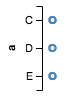

In [28]:
c = Chart(data).mark_point().encode(y='a')
c # save the Chart to a variable and then display

The result is a one-dimensional visualization representing the values taken on by `a`.
As above, we can view the JSON data generated for this visualization:

In [29]:
c.to_dict()

{'data': {'values': [{'a': 'C', 'b': 2},
   {'a': 'C', 'b': 7},
   {'a': 'C', 'b': 4},
   {'a': 'D', 'b': 1},
   {'a': 'D', 'b': 2},
   {'a': 'D', 'b': 6},
   {'a': 'E', 'b': 8},
   {'a': 'E', 'b': 4},
   {'a': 'E', 'b': 7}]},
 'encoding': {'y': {'field': 'a', 'type': 'nominal'}},
 'mark': 'point'}

The result is the same as above with the addition of the `'encoding'` key, which specifies the visualization channel (`y`), the name of the field (`a`), and the type of the variable (`nominal`).

Altair is able to automatically determine the type of the variable using built-in heuristics. Altair and Vega-Lite support four primitive data types:

<table>
  <tr>
    <th>Data Type</th>
    <th>Code</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>quantitative</td>
    <td>Q</td>
    <td>Number</td>
  </tr>
  <tr>
    <td>nominal</td>
    <td>N</td>
    <td>Unordered categorical</td>
  </tr>
  <tr>
    <td>ordinal</td>
    <td>O</td>
    <td>Ordered categorial</td>
  </tr>
  <tr>
    <td>temporal</td>
    <td>T</td>
    <td>Date/time</td>
  </tr>
</table>

You can set the data type of a column explicitely using a one letter code as follows:

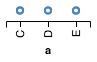

In [30]:
Chart(data).mark_point().encode(x='a:N')

The visualization can be made more interesting by adding another channel to the encoding: let's encode column `b` as the `x` position:

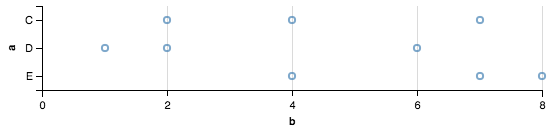

In [31]:
Chart(data).mark_point().encode(
    y='a',
    x='b'
)

With two visual channels encoded, we can see the raw data points in the `DataFrame`. A different mark type can be chosen using a different `mark_*()` method, such as `mark_bar()`:

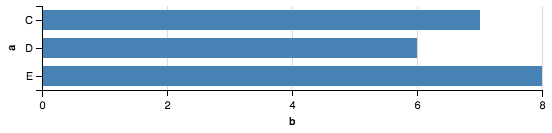

In [32]:
Chart(data).mark_bar().encode(
    Y('a'),
    X('b')
)

Notice, we have used a slightly different syntax for specifying the channels using classes (`X` and `Y`) passed as positional arguments. These classes allow additional arguments to be passed to each channel.

Here is the full set of `mark_*()` methods supported in Altair and Vega-Lite:

<table>
  <tr>
    <th>Method</th>
  </tr>
  <tr>
    <td><code>mark_area()</code></td>
  </tr>
  <tr>
    <td><code>mark_bar()</code></td>
  </tr>
  <tr>
    <td><code>mark_circle()</code></td>
  </tr>
  <tr>
    <td><code>mark_line()</code></td>
  </tr>
  <tr>
    <td><code>mark_point()</code></td>
  </tr>
  <tr>
    <td><code>mark_rule()</code></td>
  </tr>
  <tr>
    <td><code>mark_square()</code></td>
  </tr>
  <tr>
    <td><code>mark_text()</code></td>
  </tr>
  <tr>
    <td><code>mark_tick()</code></td>
  </tr>
</table>



## Data transformation: Aggregation

Altair and Vega-Lite also support a variety of built-in data transformations, such as aggregation. The easiest way to specify such aggregations is through a string-function syntax in the argument to the column name. For example, here we will plot not all the values, but a single point representing the average of the x-values for a given y-value:

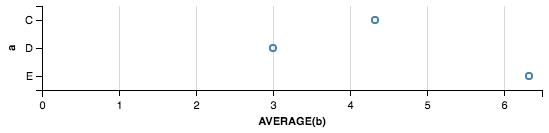

In [8]:
Chart(data).mark_point().encode(
    y='a',
    x='average(b)'
)

Conceptually, this is equivalent to the following groupby operation:

In [9]:
data.groupby('a').mean()

,b
a,
C,4.333333
D,3.000000
E,6.333333


More typically, aggregated values are displayed using bar charts.
Making this change is as simple as replacing `mark_point()` with `mark_bar()`:

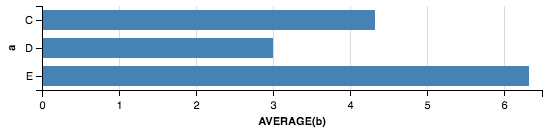

In [26]:
c = Chart(data).mark_bar().encode(
    y='a',
    x='average(b)'
)
c # save the Chart to a variable and then display

As above, Altair's role in this visualization is converting the resulting object into an appropriate JSON dict.
Here it is, leaving out the data for clarity:

In [14]:
c.to_dict(data=False)

{'encoding': {'x': {'aggregate': 'average',
   'field': 'b',
   'type': 'quantitative'},
  'y': {'field': 'a', 'type': 'nominal'}},
 'mark': 'bar'}

Notice that Altair has taken the string `'average(b)'` and converted it to a mapping that includes `field`, `type`, and `aggregate`. The full shorthand syntax for the column names in Altair also includes the explicit type code separated by a column:

In [15]:
x = X('average(b):Q')
x.to_dict()

{'aggregate': 'average', 'field': 'b', 'type': 'quantitative'}

This shorthand is equivalent to spelling-out these properties by name:

In [16]:
x = X('b', aggregate='average', type='quantitative')
x.to_dict()

{'aggregate': 'average', 'field': 'b', 'type': 'quantitative'}

This is one benefit of using the Altair API over writing the Vega-Lite spec from scratch: valid Vega-Lite specifications can be created very succinctly, with less boilerplate code.

To conclude this section we provide the full set of aggregate operations available in Altair and Vega-Lite:

In [17]:
AggregateOp().values

['values',
 'count',
 'valid',
 'missing',
 'distinct',
 'sum',
 'mean',
 'average',
 'variance',
 'variancep',
 'stdev',
 'stdevp',
 'median',
 'q1',
 'q3',
 'modeskew',
 'min',
 'max',
 'argmin',
 'argmax']

## Customizing your visualization

By default, Altair via Vega-Lite makes some choices about default properties of the visualization.
Altair also provides an API to customize the look of the visualization. For example, we can use the `X` object we saw above to override the default x-axis title:

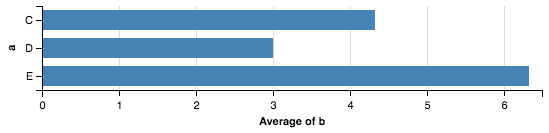

In [18]:
Chart(data).mark_bar().encode(
    y='a',
    x=X('average(b)', axis=Axis(title='Average of b'))
)

The properties of marks can be configured by passing keyword arguments to the `mark_*()` methods:

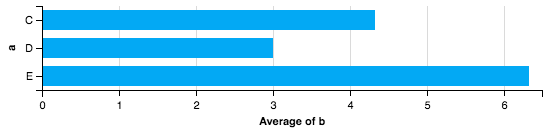

In [19]:
Chart(data).mark_bar(color='#03A9F4').encode(
    y='a',
    x=X('average(b)', axis=Axis(title='Average of b'))
)

Similarly, we can use various `configure_*()` methods to adjust global properties of the chart, such as the chart width or height:

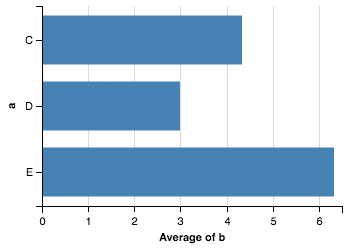

In [27]:
c = Chart(data).mark_bar().encode(
    y='a',
    x=X('average(b)', axis=Axis(title='Average of b'))
).configure_scale(
    bandSize=50  # scale.bandSize adjusts thickness (in pixels) of bars
).configure_cell(
    width=300  # cell.width adjusts the width (in pixels) of the chart
)

c # save the Chart to a variable and then display

As above, we can inspect how these configuration options affect the resulting Vega-lite specification:

In [22]:
c.to_dict(data=False)

{'config': {'cell': {'width': 300.0}, 'scale': {'bandSize': 50.0}},
 'encoding': {'x': {'aggregate': 'average',
   'axis': {'title': 'Average of b'},
   'field': 'b',
   'type': 'quantitative'},
  'y': {'field': 'a', 'type': 'nominal'}},
 'mark': 'bar'}

To learn more about the various configuration options, one useful place to start is Altair's ``Config`` object, along with IPython's documentation capabilities:

In [25]:
Config?

In addition, the Vega-Lite documentation has extensive [Configuration documentation](http://vega.github.io/vega-lite/docs/config.html) and the attribute names used there map directly to names used within Altair.

## Publishing a visualization online

Because Altair produces Vega-Lite specifications, it is relatively straightforward to export charts and publish them on the web as Vega-Lite plots.
All that is required is to load the Vega-Lite javascript library, and pass it the JSON plot specification output by Altair.
For convenience Altair contains a built-in bare-bones HTML template that can be used to display any plot.
Here's the template with an empty chart for clarity:

In [46]:
print(Chart().to_html())


<!DOCTYPE html>
<head>
  <title>Vega-Lite Chart</title>
  <meta charset="utf-8">

  <script src="//d3js.org/d3.v3.min.js"></script>
  <script src="//vega.github.io/vega/vega.js"></script>
  <script src="//vega.github.io/vega-lite/vega-lite.js"></script>
  <script src="//vega.github.io/vega-editor/vendor/vega-embed.js" charset="utf-8"></script>

  <style media="screen">
    /* Add space between vega-embed links  */
    .vega-actions a {
      margin-right: 5px;
    }
  </style>
</head>
<body>
  <!-- Container for the visualization -->
  <div id="vis"></div>

  <script>
  var vlSpec = {
    "mark": "point"
}

  var embedSpec = {
    mode: "vega-lite",  // Instruct Vega-Embed to use the Vega-Lite compiler
    spec: vlSpec
  };

  // Embed the visualization in the container with id `vis`
  vg.embed("#vis", embedSpec, function(error, result) {
    // Callback receiving the View instance and parsed Vega spec
    // result.view is the View, which resides under the '#vis' element
  });
  </sc

All that must be changed is the ``vlSpec`` variable, which should contain the Vega-Lite spec output by ``chart.to_dict()``.
To see this in action, we can save the HTML to file and open it as an IFrame:

In [47]:
chart = Chart(data).mark_bar().encode(
    y='a',
    x='average(b)'
)

# Save to file
open('example.html', 'w').write(chart.to_html())

# Display IFrame in IPython
from IPython.display import IFrame
IFrame('example.html', width=400, height=200)

Though this may not work on some online notebook renderers, you should be able to run this locally and confirm that the ``example.html`` file displays correctly.